In [5]:
__file__ = 'rad_zu_ord_fit.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP2_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat

In [6]:
with open('Data/Data.csv', mode='r') as tf:
    data = np.genfromtxt(tf,delimiter="\t",skip_header=1).T

In [7]:
slope = ufloat(41.7201052,0.17065753)
intercept = ufloat(-1.25029763,0.16276203)

In [16]:
dat1 = []
mag1 = []
dat2 = []
mag2 = []
amp1 = []
amp2 = []


for i in range(len(data[0])):
    if i%2 == 0:
        mag1.append(data[0][i])
        dat1.append(data[3][i])
        amp1.append(data[4][i])
    elif i%2 != 0:
        mag2.append(data[0][i])
        dat2.append(data[3][i])
        amp2.append(data[4][i])
        
for i in range(len(amp1)):
    amp1[i] = (amp1[i]*slope+intercept)*10**-3
    amp2[i] = (amp2[i]*slope+intercept)*10**-3




print(amp1)
print(mag1)



# del mag1[11]
# del dat1[11]
# del mag2[11]
# del dat2[11]

[0.09971235695399999+/-0.0004439067789011153, 0.11097678535799999+/-0.00048706837391650383, 0.123075615866+/-0.0005339702068585505, 0.137677652686+/-0.0005911383250557721, 0.148107678986+/-0.0006322627748590312, 0.15978930844199998+/-0.0006785479480063631, 0.17313974210599997+/-0.0007316813006803067, 0.18690737682199998+/-0.0007866869766231877, 0.19900620733+/-0.0008351696035313243, 0.212773842046+/-0.0008904744116681159, 0.22403827045+/-0.000935813603792101, 0.23738870411399998+/-0.0009896372649193144, 0.24948753462199996+/-0.0010384859178437095, 0.26283796828600003+/-0.0010924549525377035, 0.274519597742+/-0.0011397279820710463, 0.286201227198+/-0.0011870419389973079, 0.29663125349799996+/-0.0012293172775132278]
[0.101, 0.112, 0.124, 0.139, 0.15, 0.16, 0.174, 0.19, 0.2, 0.21, 0.22, 0.231, 0.24, 0.25, 0.255, 0.26, 0.265]


In [9]:
fillerr = np.full(len(dat1),0.1)
res1 = f.linear_fit(dat1,mag1,fillerr)
res2 = f.linear_fit(dat2,mag2,fillerr)

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 17
    # variables        = 2
    chi-square         = 3141.52238
    reduced chi-square = 209.434825
    Akaike info crit   = 92.7272407
    Bayesian info crit = 94.3936673
[[Variables]]
    slope:     -81.2678962 +/- 6.64042605 (8.17%) (init = -81.2679)
    intercept:  2.82588045 +/- 1.32879690 (47.02%) (init = 2.82588)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.964
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 17
    # variables        = 2
    chi-square         = 3357.11959
    reduced chi-square = 223.807973
    Akaike info crit   = 93.8556297
    Bayesian info crit = 95.5220564
[[Variables]]
    slope:      69.6437595 +/- 6.86450301 (9.86%) (init = 69.64376)
    intercept:  0.69404854 +/- 1.37363637 (197.92%) (init = 0.694048

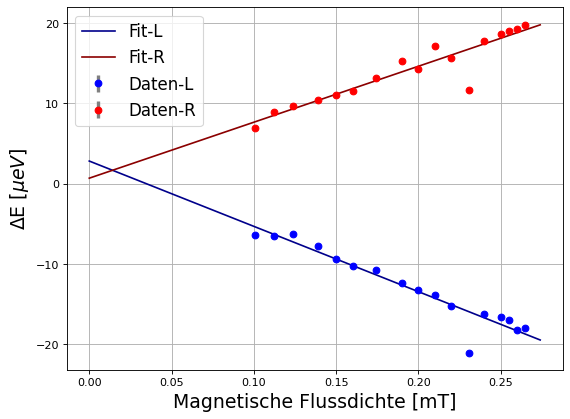

In [10]:
fig = plt.figure(figsize=(8,6),dpi=80,linewidth=50)

plt.plot(np.arange(0,0.275,0.001),res1.eval(x=np.arange(0,0.275,0.001)),color='darkblue',linestyle='-',alpha=1,label="Fit-L")
plt.plot(np.arange(0,0.275,0.001),res2.eval(x=np.arange(0,0.275,0.001)),color='darkred',linestyle='-',alpha=1,label="Fit-R")


plt.errorbar(mag1,dat1,yerr = fillerr,fmt='bo',ecolor='gray', elinewidth=3, capsize=0,label = 'Daten-L')
plt.errorbar(mag2,dat2,yerr = fillerr,fmt='ro',ecolor='gray', elinewidth=3, capsize=0,label = 'Daten-R')








plt.ylabel('$\Delta$E [$\mu eV$]',fontsize = 17)
plt.xlabel('Magnetische Flussdichte [mT]',fontsize = 17)
plt.grid()
plt.legend(fontsize = 15)

print(res1.fit_report())
print(res2.fit_report())